In [1]:
#importing libraries
import numpy as np
import pandas as pd
import re               # for regex preprocessing
import matplotlib.pyplot as plt     # for displaying image
import cv2
import dlib                 # mandatory for face_recognition library to work
from glob import glob     # to read the images from folder
from pathlib import Path as p
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error    # determine accuracy of the model
from sklearn.ensemble import RandomForestRegressor         # algorithm used for model training
from sklearn.externals import joblib               # used to save the model weights and retrieve them back
import face_recognition                         # module used for face detection
from IPython.display import Image
import seaborn as sns
from sklearn.model_selection import GridSearchCV

C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#read the csv containing the details of the people considered for training set
# it should contain columns such as Name, height(in metres), weight(in kg), BMI, id and gender

Index(['Name', 'Height', 'Weight', 'BMI', 'id', 'Gender'], dtype='object')

In [3]:
#read the folder containing the training images
files = glob(data_path + "/*")
jpg_pics = sorted([img for img in files if ".jpg" in img or ".jpeg" or ".JPG" in img])    # reading all the image files from the folder
len(jpg_pics)

288

In [4]:
def get_index_of_digit(string):
    match = re.search("\d", p(string).stem)         # find the name of the person whose image is read
    return match.start(0)

In [5]:
id_path = [(p(images).stem[:(get_index_of_digit(p(images).stem))],images) for images in jpg_pics ]    #retrieving the ids of the celebrities

In [6]:
image_df = pd.DataFrame(id_path, columns = ['id','path'])

In [7]:
data = image_df.merge(bmi_data)     # merging the 2 dataframes

In [8]:
def replace1(str1):
    string = str1.replace('\\',r'/')
    return string

In [9]:
data['path'] = data['path'].apply(replace1)

In [22]:
def get_face_encoding(image_path):
    print(image_path)
    picture = face_recognition.load_image_file(image_path)      #loading the image file when reading it from id
    face_encode = face_recognition.face_encodings(picture)      # face detection of the person
    if not face_encode:
        print("NO FACE DETECTED!")
        return np.zeros(128).tolist()
    return face_encode[0].tolist()                         # face encoding the faces detected

In [82]:
faces = []
for images in data.path:
    face_encoder = get_face_encoding(images)
    faces.append(face_encoder)

In [24]:
X = np.array(faces)     # converting the face encodings to an array

In [25]:
y_height = data.Height.values

In [26]:
y_weight = data.Weight.values

In [27]:
y_bmi = data.BMI.values

In [28]:
bmi_data['Gender'].value_counts()

M    32
F    22
Name: Gender, dtype: int64

In [29]:
male_bmi_data = bmi_data[bmi_data['Gender'] == 'M']

In [30]:
female_bmi_data = bmi_data[bmi_data['Gender'] == 'F']

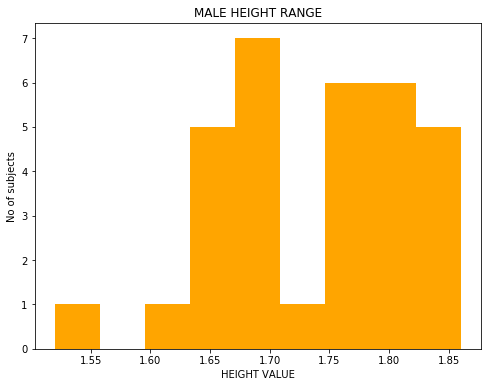

In [31]:
plt.figure(figsize=(8,6))
plt.hist(male_bmi_data['Height'], bins = 9, color = 'orange')
plt.title('MALE HEIGHT RANGE')
plt.xlabel("HEIGHT VALUE")
plt.ylabel("No of subjects")
plt.show()

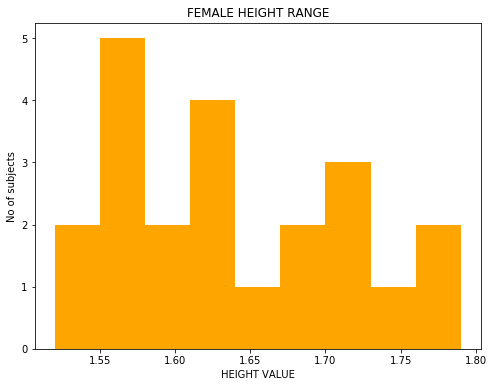

In [32]:
plt.figure(figsize=(8,6))
plt.hist(female_bmi_data['Height'], bins = 9, color = 'orange')
plt.title('FEMALE HEIGHT RANGE')
plt.xlabel("HEIGHT VALUE")
plt.ylabel("No of subjects")
plt.show()

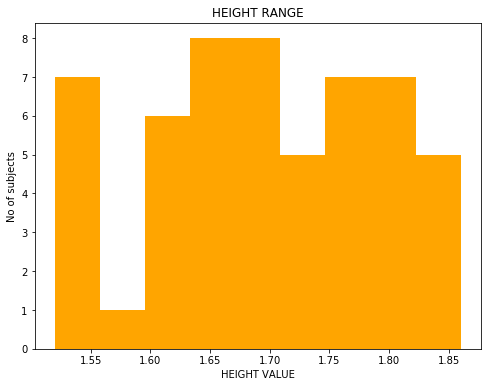

In [33]:
plt.figure(figsize=(8,6))
plt.hist(bmi_data['Height'], bins = 9, color = 'orange')
plt.title('HEIGHT RANGE')
plt.xlabel("HEIGHT VALUE")
plt.ylabel("No of subjects")
plt.show()

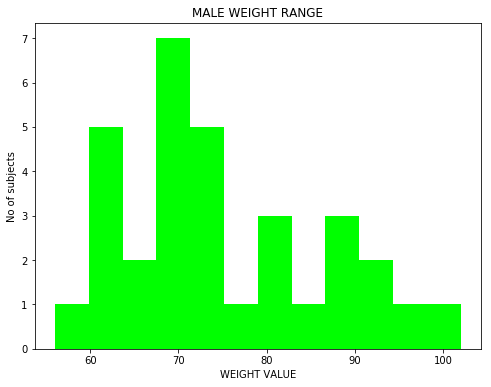

In [34]:
plt.figure(figsize=(8,6))
plt.hist(male_bmi_data['Weight'], bins = 12, color = 'lime')
plt.title('MALE WEIGHT RANGE')
plt.xlabel("WEIGHT VALUE")
plt.ylabel("No of subjects")
plt.show()

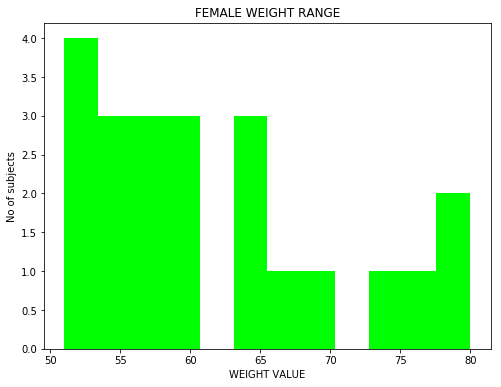

In [35]:
plt.figure(figsize=(8,6))
plt.hist(female_bmi_data['Weight'], bins = 12, color = 'lime')
plt.title('FEMALE WEIGHT RANGE')
plt.xlabel("WEIGHT VALUE")
plt.ylabel("No of subjects")
plt.show()

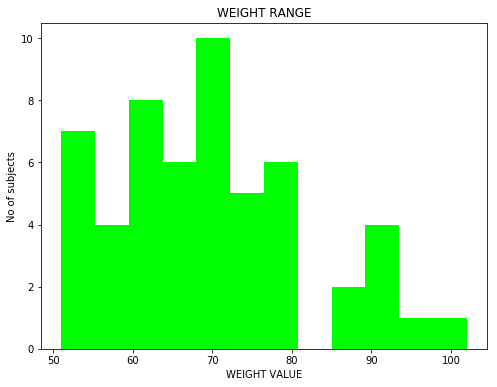

In [36]:
plt.figure(figsize=(8,6))
plt.hist(bmi_data['Weight'], bins = 12, color = 'lime')
plt.title('WEIGHT RANGE')
plt.xlabel("WEIGHT VALUE")
plt.ylabel("No of subjects")
plt.show()

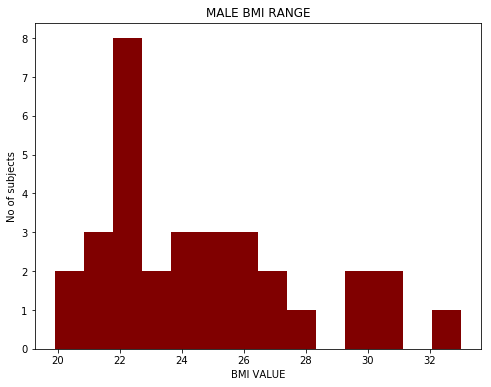

In [37]:
plt.figure(figsize=(8,6))
plt.hist(male_bmi_data['BMI'], bins = 14, color = 'maroon')
plt.title('MALE BMI RANGE')
plt.xlabel("BMI VALUE")
plt.ylabel("No of subjects")
plt.show()

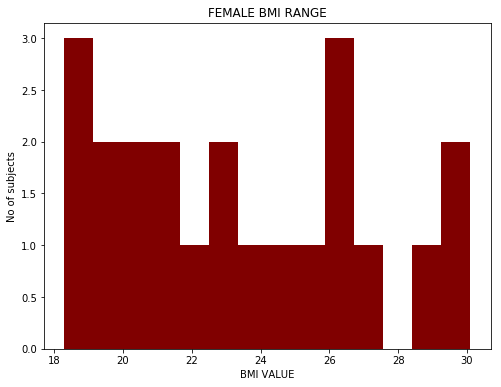

In [38]:
plt.figure(figsize=(8,6))
plt.hist(female_bmi_data['BMI'], bins = 14, color = 'maroon')
plt.title('FEMALE BMI RANGE')
plt.xlabel("BMI VALUE")
plt.ylabel("No of subjects")
plt.show()

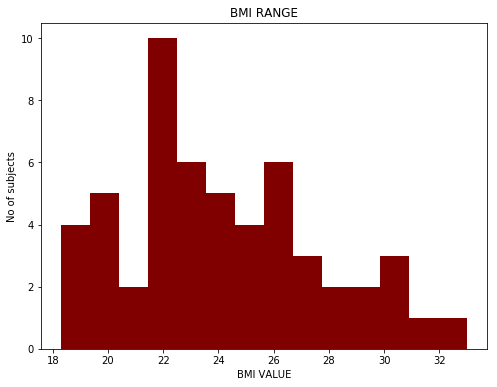

In [39]:
plt.figure(figsize=(8,6))
plt.hist(bmi_data['BMI'], bins = 14, color = 'maroon')
plt.title('BMI RANGE')
plt.xlabel("BMI VALUE")
plt.ylabel("No of subjects")
plt.show()

In [40]:
X.shape

(288, 128)

In [41]:
X_train, X_test, yheight_train, yheight_test, yweight_train, yweight_test, ybmi_train, ybmi_test = train_test_split(X, y_height, y_weight, y_bmi, test_size = 0.1, random_state = 42)

In [42]:
X_train.shape

(259, 128)

In [43]:
yheight_train.shape

(259,)

In [44]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=300, num=5)]
max_features = ['auto']
max_depth = [int(x) for x in np.linspace(15, 30, num=4)]
min_samples_split = [5,10,20]
min_samples_leaf = [1,2,5,10]

random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}

rfr = RandomForestRegressor()

grid_search1 = GridSearchCV(estimator=rfr, param_grid=random_grid, cv=3, verbose=1)

grid_search1.fit(X_train, yheight_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 13.1min finished
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [15, 20, 25, 30],


In [45]:
grid_search1.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [46]:
height_pred2 = grid_search1.predict(X_test)
mean_squared_error(height_pred2, yheight_test)

0.0017148908327414502

In [47]:
error = abs(height_pred2 - yheight_test)
mape = 100 * np.mean(error/yheight_test)
accuracy = 100 - mape
accuracy                  # code to find accuracy of the training model

98.07577991733423

In [49]:
grid_search2 = GridSearchCV(estimator=rfr, param_grid=random_grid, cv=3, verbose=1)

grid_search2.fit(X_train, yweight_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 13.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [15, 20, 25, 30],


In [50]:
grid_search2.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 250}

In [51]:
weight_pred2 = grid_search2.predict(X_test)
mean_squared_error(weight_pred2, yweight_test)

36.3539137698438

In [52]:
error = abs(weight_pred2 - yweight_test)
mape = 100 * np.mean(error/yweight_test)
accuracy = 100 - mape
accuracy

94.53729293483951

In [53]:
grid_search3 = GridSearchCV(estimator=rfr, param_grid=random_grid, cv=3, verbose=1)

grid_search3.fit(X_train, ybmi_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 13.4min finished
C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [15, 20, 25, 30],


In [54]:
grid_search3.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [55]:
bmi_pred2 = grid_search3.predict(X_test)
mean_squared_error(bmi_pred2, ybmi_test)

2.991189515514533

In [56]:
error = abs(bmi_pred2 - ybmi_test)
mape = 100 * np.mean(error/ybmi_test)
accuracy = 100 - mape
accuracy

94.05388843002709

In [57]:
#creating files where the weights will be saved
# defining the path to save the model weights

In [58]:
# writing the files with the model weights
joblib.dump(grid_search1, height_coords)
joblib.dump(grid_search2, weight_coords)
joblib.dump(grid_search3, bmi_coords)

['F:/Technokart/bmi_model.pkl']

In [59]:
# load the model weights for prediction
height_model_weights = joblib.load(height_coords)
weight_model_weights = joblib.load(weight_coords)
bmi_model_weights = joblib.load(bmi_coords)

In [60]:
# the prediction function
def predict_height_width_BMI(test_image,height_model1,weight_model1,bmi_model1):
    test_array = np.expand_dims(np.array(get_face_encoding(test_image)),axis=0)
    height = np.ndarray.item(height_model1.predict(test_array))
    h1 = height * 39.37
    feet = int(h1/12)
    inch = int(h1%12)
    weight = np.ndarray.item(weight_model1.predict(test_array))
    bmi = np.ndarray.item(bmi_model1.predict(test_array))
    if bmi < 19:
        print("UNDERWEIGHT")
    elif bmi > 25.6:
        print("OVERWEIGHT")
    else:
        print("NORMAL")
    return {'feet':feet, 'inch': inch, 'weight(kg)':weight, 'bmi(kg/m^2)':bmi}